# Predictive Modeling

This notebook will encompass the predictive modeling component of the mushroom classification problem. The goal is to be 100% accurate -- this isn't necessarily the exact goal of every data science problem, but because this classifcation problem is being exercised on mushrooms that are either poisonous or edible, 100% accuracy is a must. Even one error could result in someone's death if they accidentally ingest a poisonous mushroom that was falsely classified as being edible.

In [2]:
# First step -- let's load in some necessary libraries

import pandas as pd
import numpy as np

In [3]:
# Now that we've imported pandas, let's read in the binarized mushroom dataframe
shrooms = pd.read_csv('../datasets/binarized_mushroom_data.csv')

# Drop the colunmn 'Unnamed: 0', which must have been created somewhere in the saving/uploading process
shrooms.drop(columns = 'Unnamed: 0', inplace = True)

# Preview the dataframe
shrooms

,class_edible,class_poisonous,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_subnken,cap-surface_fibrous,cap-surface_grooves,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8120,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
8121,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8122,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


#### Drop column "class_poisonous"

For this problem, the 2 columns "class_edible" and "class_poisonous" are redundant. That is, only one of them is required: for example, a 0 in the "class_edible" column indicates that the mushroom is poisonous, and vice versa.

In [4]:
shrooms.drop(columns = 'class_poisonous', inplace = True)
shrooms.head()

,class_edible,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_subnken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### So what kind of model should we use?

Right away, we're able to tell that this is a classification problem, which means a `Logistic Regression` is appropriate for this problem, as opposed to a `Linear Regression`. If we end up exploring other machine learning libraries in this notebook, it's important to note that we should use applications for `discrete` data as opposed to data that's `continuous`. After all, this problem really is a "yes or no" problem, with "yes = edible" and "no = poisonous".

In [5]:
# Let's import a machine learning library from sklearn for Logistic Regressions, which are used for classification
#/n problems such as this
from sklearn.linear_model import LogisticRegression

# Let's also import train-test-split, which will be crucial later when testing training our model and testing
#/n its effectiveness
from sklearn.model_selection import train_test_split

#### Preliminary Logistic Regression Model

To start, let's use every variable available in our dataset in our model.

In [6]:
# Define X and y
X = shrooms.drop(columns = 'class_edible')
y = shrooms['class_edible']

# We'll use the same random state each time so we can objectively compare different model results
# Use train_test_split to create train and test data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2,
                                                    random_state = 42)
# Instantiate a Logistic Regression model
lg = LogisticRegression()

# Fit the model with the train data
lg.fit(X_train, y_train);

**So how did this model do?** Let's import some tools for analyzing this model's metrics.

In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
preds = lg.predict(X_test)

print(f'MSE is {mean_squared_error(y_test, preds)}')
print(f'RMSE is {np.sqrt(mean_squared_error(y_test, preds))}')
print(f'The train score of this model is {lg.score(X_train, y_train)}')
print(f'The test score of this model is {lg.score(X_test, y_test)}')

MSE is 0.0
RMSE is 0.0
The train score of this model is 1.0
The test score of this model is 1.0


The MSE and RMSE have values of 0 and the `train score` and `test score` of this model are 1.0, indicating that our model has 100% perfect accuracy. But is this ideal? Our goal was to have 100% accuracy, yes, but it could be that this model is too perfect. To put it another way, this model may very well be overfit to the data, meaning that it will do a poor job of accurately classifying mushrooms as either edible or poisonous with any newly inputted data.

Next, we'll see if removing some less impactful variables from the model will still yield perfect results. As a reminder, let's take a look at a `heatmap` of all the independent variables in this model:

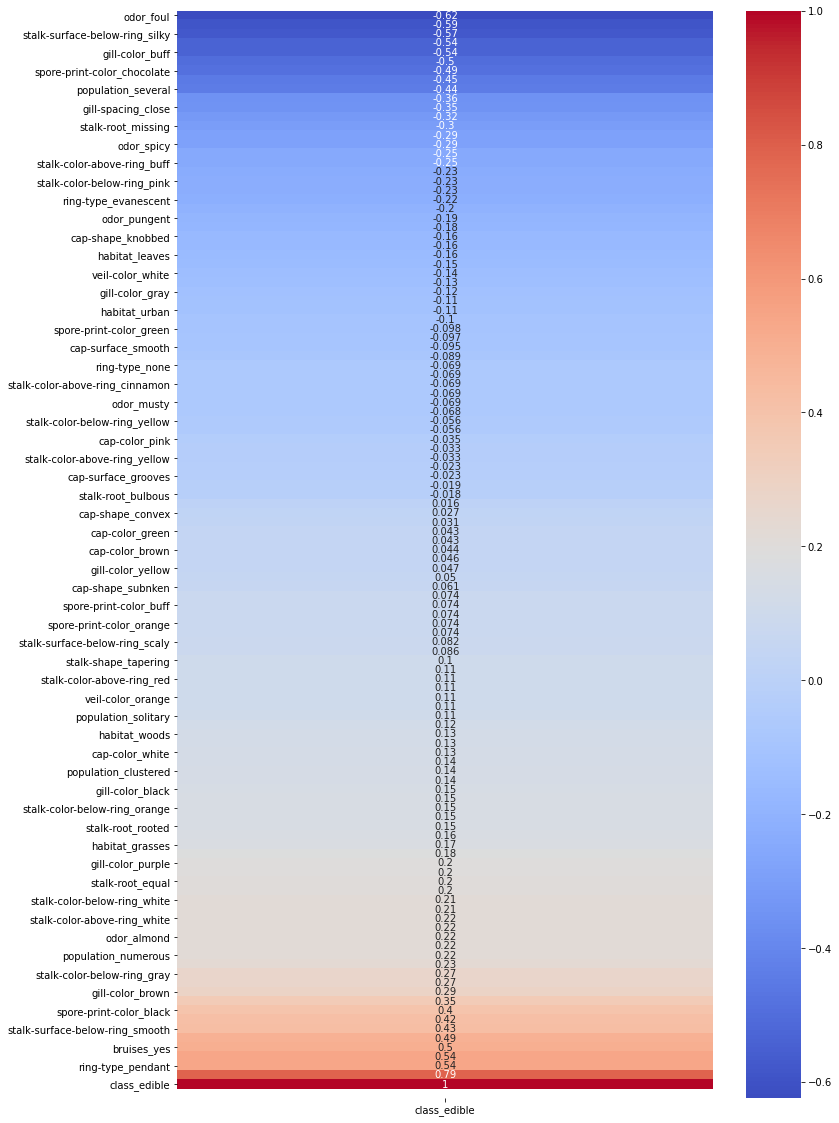

In [10]:
# Import necessary libraries / tools
import seaborn as sns
import matplotlib.pyplot as plt

# Program the heatmap
plt.figure(figsize = (12, 20))
sns.heatmap(shrooms.corr()[['class_edible']].sort_values('class_edible'),
            cmap = 'coolwarm',
            annot = True);

In [20]:
# Define a function that will only select 'statistically signifact independent variables'

# Define the function
def variable_selection(df):
    
    # Create an empty list titled 'variables'
    variables = []
    
    # Start a for loop to examine each variable 
    for i in df:
        
        # Our condition for determining 'statistical signifigance' is the absolute value of the correlation
        #/n coefficnient that's greater than 0.15. This is an arbitrary selection from examining the heatmap
        #/n above, and this value can always be changed below
        if abs(df.corr()['class_edible'][i]) > 0.15:
            
            # Append the variable to the empty list if it meets the criteria
            variables.append(i)
    
    # Return our selected variables
    return variables

# Run the test to see if it worked
variable_selection(shrooms)

['class_edible',
 'cap-shape_bell',
 'cap-shape_knobbed',
 'cap-surface_fibrous',
 'bruises_no',
 'bruises_yes',
 'odor_almond',
 'odor_anise',
 'odor_creosote',
 'odor_fishy',
 'odor_foul',
 'odor_none',
 'odor_pungent',
 'odor_spicy',
 'gill-spacing_close',
 'gill-spacing_crowded',
 'gill-size_broad',
 'gill-size_narrow',
 'gill-color_brown',
 'gill-color_buff',
 'gill-color_chocolate',
 'gill-color_purple',
 'gill-color_white',
 'stalk-root_club',
 'stalk-root_equal',
 'stalk-root_missing',
 'stalk-root_rooted',
 'stalk-surface-above-ring_silky',
 'stalk-surface-above-ring_smooth',
 'stalk-surface-below-ring_silky',
 'stalk-surface-below-ring_smooth',
 'stalk-color-above-ring_brown',
 'stalk-color-above-ring_buff',
 'stalk-color-above-ring_gray',
 'stalk-color-above-ring_orange',
 'stalk-color-above-ring_pink',
 'stalk-color-above-ring_white',
 'stalk-color-below-ring_brown',
 'stalk-color-below-ring_buff',
 'stalk-color-below-ring_gray',
 'stalk-color-below-ring_orange',
 'stalk-co

**How many independent variables do we have this time around?** Looking at the cell below, we can see that we've reduced the number of independent variables from 119 to 60, a roughly 50% reduction.

In [23]:
len(variable_selection(shrooms))

60

**Let's create the same Logistic Regression Model as before with our smaller list of variables**

In [21]:
# Define X and y
X = shrooms[variable_selection(shrooms)]
y = shrooms['class_edible']

# We'll use the same random state each time so we can objectively compare different model results
# Use train_test_split to create train and test data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2,
                                                    random_state = 42)
# Instantiate a Logistic Regression model
lg = LogisticRegression()

# Fit the model with the train data
lg.fit(X_train, y_train);

In [22]:
preds_less_variables = lg.predict(X_test)

print(f'MSE is {mean_squared_error(y_test, preds_less_variables)}')
print(f'RMSE is {np.sqrt(mean_squared_error(y_test, preds_less_variables))}')
print(f'The train score of this model is {lg.score(X_train, y_train)}')
print(f'The test score of this model is {lg.score(X_test, y_test)}')

MSE is 0.0
RMSE is 0.0
The train score of this model is 1.0
The test score of this model is 1.0


#### With roughly half as many variables, our model is still 100% accurate. We were able to maintain perfect predictions while also eliminating some of the noise in the Logistic Re.

## Conclusions

There are a few takeaways that should be mentioned, some of which have already been mentioned in this notebook and some of which have not.

**Risk of being overfit.** As is explained above, there's a risk with this model being overfit. The chances are lower likely after achieving the same 100% accuracy after reducing the number of independent variables in the model, but it's still something to be wary of, especially if using this model to make predictions on mushroom data that is included in neither the `train` nor the `test` dataset.

**Accuracy of data.** This data was downloaded from `https://www.kaggle.com/uciml/mushroom-classification`, and I'm at the mercy of its integrity. I myself am not a mushroom hunter; when I look at the `spore-print-color` column, for instance, and see two different classifcations labeled `brown` and `chocolate`, my mind immediately begins to worry. The gravity of this data science problem is that of life and death (if a `poisonous` mushroom is misclassified as `edible` and consumed, it can cause death). I don't trust my own abilities to distinguish between the colors `chocolate` and `brown`, and I'd hope that professional mushroom foragers would be able to make the distinction. It should be noted that this murky classification is not limited to the `spore-print-color` designation.